In [66]:
from lxml import html
import requests
import re
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time
import seaborn as sns

In [67]:
df1 = pd.read_csv('New_Releases_Whiskey_Data.csv')
df2 = pd.read_csv('Top_1000_Whiskey_Data.csv')

In [68]:
df1.head()

,Unnamed: 0,price,rating,url,user,whiskey
0,0,"€ 50,88",88,https://www.whiskybase.com/whiskies/whisky/128...,benfolt,1770-glasgow-single-malt
1,1,"€ 50,88",88,https://www.whiskybase.com/whiskies/whisky/128...,Tommib,1770-glasgow-single-malt
2,2,"€ 50,88",87,https://www.whiskybase.com/whiskies/whisky/128...,ekonshin,1770-glasgow-single-malt
3,3,"€ 50,88",87,https://www.whiskybase.com/whiskies/whisky/128...,MisterED,1770-glasgow-single-malt
4,4,"€ 50,88",86,https://www.whiskybase.com/whiskies/whisky/128...,whiskyleaksulm,1770-glasgow-single-malt


In [69]:
df2.head()

,Unnamed: 0,price,rating,url,user,whiskey
0,0,"€ 40500,00",100,https://www.whiskybase.com/whiskies/whisky/244...,Udovitsa Andrey,laphroaig-1967-rwd
1,1,"€ 40500,00",99,https://www.whiskybase.com/whiskies/whisky/244...,Alonzo,laphroaig-1967-rwd
2,2,"€ 40500,00",99,https://www.whiskybase.com/whiskies/whisky/244...,whiskycuse,laphroaig-1967-rwd
3,3,"€ 40500,00",99,https://www.whiskybase.com/whiskies/whisky/244...,Nopax,laphroaig-1967-rwd
4,4,"€ 40500,00",99,https://www.whiskybase.com/whiskies/whisky/244...,WhiskyJug,laphroaig-1967-rwd


In [70]:
df = pd.concat([df1, df2], axis=0)
# df = df1.merge(df2, how='outer')

In [71]:
len(df1)

7431

In [72]:
len(df2)

40657

In [73]:
len(df)
#without outer join

48088

In [74]:
len(df)

48088

In [75]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [76]:
df.head()

,price,rating,url,user,whiskey
0,"€ 50,88",88,https://www.whiskybase.com/whiskies/whisky/128...,benfolt,1770-glasgow-single-malt
1,"€ 50,88",88,https://www.whiskybase.com/whiskies/whisky/128...,Tommib,1770-glasgow-single-malt
2,"€ 50,88",87,https://www.whiskybase.com/whiskies/whisky/128...,ekonshin,1770-glasgow-single-malt
3,"€ 50,88",87,https://www.whiskybase.com/whiskies/whisky/128...,MisterED,1770-glasgow-single-malt
4,"€ 50,88",86,https://www.whiskybase.com/whiskies/whisky/128...,whiskyleaksulm,1770-glasgow-single-malt


In [77]:
df5 = df.groupby('user').filter(lambda x: len(x)>5)

In [78]:
df5

,price,rating,url,user,whiskey
0,"€ 50,88",88,https://www.whiskybase.com/whiskies/whisky/128...,benfolt,1770-glasgow-single-malt
3,"€ 50,88",87,https://www.whiskybase.com/whiskies/whisky/128...,MisterED,1770-glasgow-single-malt
4,"€ 50,88",86,https://www.whiskybase.com/whiskies/whisky/128...,whiskyleaksulm,1770-glasgow-single-malt
5,"€ 50,88",85,https://www.whiskybase.com/whiskies/whisky/128...,Poppi,1770-glasgow-single-malt
7,"€ 50,88",84,https://www.whiskybase.com/whiskies/whisky/128...,Quin,1770-glasgow-single-malt
9,"€ 50,88",80,https://www.whiskybase.com/whiskies/whisky/128...,Tom na Gruagaich,1770-glasgow-single-malt
10,"€ 79,99",90,https://www.whiskybase.com/whiskies/whisky/125...,Roman,a-dream-of-scotland-islay-cask-strength-bw
12,"€ 79,99",90,https://www.whiskybase.com/whiskies/whisky/125...,Dramtastic55,a-dream-of-scotland-islay-cask-strength-bw
14,"€ 79,99",89,https://www.whiskybase.com/whiskies/whisky/125...,indyjones,a-dream-of-scotland-islay-cask-strength-bw
15,"€ 79,99",89,https://www.whiskybase.com/whiskies/whisky/125...,maltymalts,a-dream-of-scotland-islay-cask-strength-bw


In [79]:
df5.user.value_counts()

hiroshi              462
Yuxan                291
jyuichi              264
Sands81              255
Kelly-maison         244
whiskycross          232
fesse                232
Nanjing              229
tk0712               226
Gedeon               225
ChengA               215
Shor5768             201
Versucher            199
Heller               197
Entscheidung         195
Jazzvin              195
Vermont              192
Luprit               190
glennoname           189
Nurmaliss            185
Lynchpin             185
Agardarayet          185
phoenix              180
Fanaberex            178
Mordan               176
Portacon             175
openinterface        174
Heimbach             173
vandervelde          172
sigma6               171
                    ... 
ELEL6200               6
malt1973               6
Floppo                 6
Loewe                  6
Robert2207             6
StanM                  6
zid11                  6
Whisky_Momente         6
CzechItOut             6


In [80]:
df5[df5.user=='hiroshi'].head()

,price,rating,url,user,whiskey
36,"€ 40500,00",96,https://www.whiskybase.com/whiskies/whisky/244...,hiroshi,laphroaig-1967-rwd
99,"€ 31960,14",97,https://www.whiskybase.com/whiskies/whisky/885...,hiroshi,bowmore-1966-sa
175,"€ 13131,35",98,https://www.whiskybase.com/whiskies/whisky/157...,hiroshi,springbank-1969-sv
265,"€ 3300,00",95,https://www.whiskybase.com/whiskies/whisky/120...,hiroshi,strathisla-1967-rwd
307,"€ 8999,00",96,https://www.whiskybase.com/whiskies/whisky/232...,hiroshi,laphroaig-1970-rwd


In [81]:
len(df5.user)

42647

In [82]:
len(df5.user.value_counts())

1223

In [83]:
len(df.user.value_counts())

3937

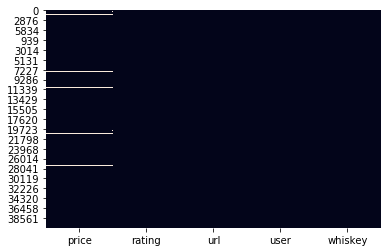

In [84]:
sns.heatmap(df5.isnull(), cbar=False)

In [85]:
df5.dropna(inplace=True)

/Users/austinkrause/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [86]:
len(df5.user.value_counts())

1223

In [87]:
df5['user_ID'] = df5.groupby('user').grouper.group_info[0]

/Users/austinkrause/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [88]:
df5.head()

,price,rating,url,user,whiskey,user_ID
0,"€ 50,88",88,https://www.whiskybase.com/whiskies/whisky/128...,benfolt,1770-glasgow-single-malt,852
3,"€ 50,88",87,https://www.whiskybase.com/whiskies/whisky/128...,MisterED,1770-glasgow-single-malt,459
4,"€ 50,88",86,https://www.whiskybase.com/whiskies/whisky/128...,whiskyleaksulm,1770-glasgow-single-malt,1205
5,"€ 50,88",85,https://www.whiskybase.com/whiskies/whisky/128...,Poppi,1770-glasgow-single-malt,547
7,"€ 50,88",84,https://www.whiskybase.com/whiskies/whisky/128...,Quin,1770-glasgow-single-malt,562


In [89]:
df[df.user=='Hvdree' ]

,price,rating,url,user,whiskey
195,"€ 114,51",82,https://www.whiskybase.com/whiskies/whisky/129...,Hvdree,affinity-cb
345,"€ 60,00",88,https://www.whiskybase.com/whiskies/whisky/125...,Hvdree,ardmore-2009-arc
413,"€ 71,50",86,https://www.whiskybase.com/whiskies/whisky/126...,Hvdree,ardmore-2013-am
571,"€ 99,09",87,https://www.whiskybase.com/whiskies/whisky/127...,Hvdree,auchentoshan-2000-mos
816,"€ 120,57",88,https://www.whiskybase.com/whiskies/whisky/130...,Hvdree,ben-nevis-1996-bd
867,"€ 144,18",90,https://www.whiskybase.com/whiskies/whisky/125...,Hvdree,ben-nevis-1996-pst
893,"€ 133,98",89,https://www.whiskybase.com/whiskies/whisky/126...,Hvdree,ben-nevis-2003-ba
937,"€ 46,95",85,https://www.whiskybase.com/whiskies/whisky/125...,Hvdree,ben-nevis-2015-cm
982,"€ 118,00",91,https://www.whiskybase.com/whiskies/whisky/127...,Hvdree,benrinnes-1995-ca
1028,"€ 139,00",87,https://www.whiskybase.com/whiskies/whisky/129...,Hvdree,benrinnes-1995-sv


In [90]:
df5[df5.user=='Yuxan'].head()

,price,rating,url,user,whiskey,user_ID
44,"€ 40500,00",95,https://www.whiskybase.com/whiskies/whisky/244...,Yuxan,laphroaig-1967-rwd,808
290,"€ 8999,00",99,https://www.whiskybase.com/whiskies/whisky/232...,Yuxan,laphroaig-1970-rwd,808
344,"€ 6373,75",98,https://www.whiskybase.com/whiskies/whisky/926...,Yuxan,springbank-100-proof,808
551,"€ 4616,93",96,https://www.whiskybase.com/whiskies/whisky/251...,Yuxan,glenfarclas-1958-sv,808
583,"€ 2440,00",98,https://www.whiskybase.com/whiskies/whisky/176...,Yuxan,caol-ila-1968-rwd,808


In [92]:
yux = df5[df5.user_ID==808]

In [93]:
yux['whiskey'][yux['rating']> 96]

290             laphroaig-1970-rwd
344           springbank-100-proof
583              caol-ila-1968-rwd
978                   bowmore-1956
1577                 macallan-1951
1615            bowmore-1964-black
1895          glen-garioch-1971-sa
2277                   ardbeg-1976
2852                 macallan-1972
3080               springbank-1962
4022     glenury-royal-50-year-old
4413                laphroaig-1980
7409          springbank-100-proof
7758                laphroaig-1981
11247    glenglassaugh-40-year-old
Name: whiskey, dtype: object

In [94]:
df5.user_ID.describe()

count    41157.000000
mean       563.068931
std        345.489910
min          0.000000
25%        268.000000
50%        548.000000
75%        852.000000
max       1222.000000
Name: user_ID, dtype: float64

In [95]:
len(df5.whiskey.value_counts())

1092

In [96]:
df5.drop(columns=['user'], inplace=True)

/Users/austinkrause/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [1]:
df5[df5['user_ID'] == 100]

NameError: name 'df5' is not defined

In [103]:
df5 = df5.drop_duplicates()

In [104]:
df5.describe()

,rating,user_ID
count,41018.000000,41018.000000
mean,92.900556,562.449388
std,3.277837,345.370426
min,2.000000,0.000000
25%,92.000000,268.000000
50%,93.000000,548.000000
75%,95.000000,851.000000
max,100.000000,1222.000000


In [121]:
df5['price(euro)'] = df5['price'].str.replace(',','.').str[2:].astype(float)


/Users/austinkrause/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [127]:
df5['price(dollar)'] = round(df5['price(euro)'] * 1.12, 2)

/Users/austinkrause/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [130]:
df5 = df5.drop('price', axis=1)

In [132]:
df5.head()

,rating,url,whiskey,user_ID,price(euro),price(dollar)
0,88,https://www.whiskybase.com/whiskies/whisky/128...,1770-glasgow-single-malt,852,50.88,56.99
3,87,https://www.whiskybase.com/whiskies/whisky/128...,1770-glasgow-single-malt,459,50.88,56.99
4,86,https://www.whiskybase.com/whiskies/whisky/128...,1770-glasgow-single-malt,1205,50.88,56.99
5,85,https://www.whiskybase.com/whiskies/whisky/128...,1770-glasgow-single-malt,547,50.88,56.99
7,84,https://www.whiskybase.com/whiskies/whisky/128...,1770-glasgow-single-malt,562,50.88,56.99


In [133]:
df5.to_csv('final_whiskey_data.csv')

In [136]:
len(df5['user_ID'].unique())

1223